## Work related to parsing the scada files

In [152]:
# All the import 
import pandas as pd
import numpy as np
from netCDF4 import Dataset, MFDataset, num2date
from os import listdir
from os.path import isfile, join
import gzip
import shutil
from sh import gunzip
import matplotlib.pyplot as plt
import matplotlib as ply

In [2]:
 path_scada_2017_07 = "../data/rawdata/SCADA/2017/07"

In [3]:
listdir(path_scada_2017_07)

['22', '23', '24', '25', '26', '27', '28', '29', '30', '31']

In [30]:
# Get the days in the month folder
days_in_month = listdir(path_scada_2017_07)

In [31]:
days_in_month

['22', '23', '24', '25', '26', '27', '28', '29', '30', '31']

In [52]:
files_22 = listdir(join(path_scada_2017_07, days_in_month[0]))

In [53]:
files_22

['PokerFlatResearchRange-PokerFlat-PokerFlat1EaNetTot@2017-07-21T201417Z@PT11H@PT144F.nc.gz',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EapaTot@2017-07-21T201417Z@PT11H@PT144F.nc.gz',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EapbTot@2017-07-21T201417Z@PT11H@PT144F.nc.gz',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EapcTot@2017-07-21T201417Z@PT11H@PT144F.nc.gz',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EapTot@2017-07-21T201417Z@PT11H@PT144F.nc.gz',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EaRec@2017-07-21T201417Z@PT11H@PT144F.nc.gz',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EbDel@2017-07-21T201417Z@PT11H@PT144F.nc.gz',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EbNetTot@2017-07-21T201417Z@PT11H@PT144F.nc.gz',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EbRec@2017-07-21T201417Z@PT11H@PT144F.nc.gz',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EcDel@2017-07-21T201417Z@PT11H@PT144F.nc.gz',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EcNetTot@2017-07-21T201417Z@PT11

In [55]:
for i in files_22:
    gunzip(join(join(path_scada_2017_07, days_in_month[0]), i))

In [56]:
files_22_nc = listdir(join(path_scada_2017_07, days_in_month[0]))

In [58]:
files_22_nc

['PokerFlatResearchRange-PokerFlat-PokerFlat1EaNetTot@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EapaTot@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EapbTot@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EapcTot@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EapTot@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EaRec@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EbDel@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EbNetTot@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EbRec@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EcDel@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResearchRange-PokerFlat-PokerFlat1EcNetTot@2017-07-21T201417Z@PT11H@PT144F.nc',
 'PokerFlatResea

In [111]:
f1_nc = Dataset(join(join(path_scada_2017_07, days_in_month[0]), 'PokerFlatResearchRange-PokerFlat-PokerFlat1VllMean@2017-07-21T201417Z@PT11H@PT144F.nc'))

In [93]:
files_22_nc[0]

'PokerFlatResearchRange-PokerFlat-PokerFlat1EaNetTot@2017-07-21T201417Z@PT11H@PT144F.nc'

In [112]:
f1_nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Latitude: 65.12524
    Longitude: -147.487778
    AirportCode: FAI
    PlaceName: PokerFlatResearchRange
    UtilityName: GVEA
    StationName: PokerFlat
    Make: ELKOR
    Model: WattsOn
    SpecSheetURL: http://www.elkor.net/pdfs/WattsOn-Mark_II_Datasheet.pdf
    dimensions(sizes): time(292477)
    variables(dimensions): float64 time(time), float64 value(time)
    groups: 

In [113]:
for v in f1_nc.variables:
    print(v)
    print(f1_nc.variables[v])

time
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: seconds
    description: seconds since the UNIX epoch
unlimited dimensions: time
current shape = (292477,)
filling on, default _FillValue of 9.969209968386869e+36 used

value
<class 'netCDF4._netCDF4.Variable'>
float64 value(time)
    description: Average Voltage L-L
    TypeOfMeasurement: Voltage
    Accuracy: 0.30%
    Resolution: 
    Units: V
    DeviceRangeMax: 
    DeviceRangeMin: 
    DeviceInstallationDate: 7/19/2017
    Type: 
    TypeDescription: 
    Make: 
    Model: 
    Year: 
    DateInstalled: 
    URLOfQAReport: 
    URLOfDataLicense: 
    DataProvider: ACEP
    QAProvider: 
    CopyrightHolder: ACEP
    URI: 
    time: 
    value: 
    SamplingRate: 
    Scale: 1
    Offset: 0
    RangeMax: 
    RangeMin: 
    TheoreticalRangeMax: 
    TheoreticalRangeMin: 
    ChannelName: FLOAT
    OriginalChannelName: 521
    OriginalUnits: V
    DailyMin: 
    DailyMax: 
    DailyMean: 
    DailyStdDev: 
    Mo

In [114]:
print(f1_nc.data_model)

NETCDF3_CLASSIC


In [115]:
print(f1_nc.dimensions)

OrderedDict([('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 292477
)])


In [116]:
print(f1_nc['Latitude'])

IndexError: Latitude not found in /

In [117]:
f1_nc.__dict__

OrderedDict([('Latitude', '65.12524'),
             ('Longitude', '-147.487778'),
             ('AirportCode', 'FAI'),
             ('PlaceName', 'PokerFlatResearchRange'),
             ('UtilityName', 'GVEA'),
             ('StationName', 'PokerFlat'),
             ('Make', 'ELKOR'),
             ('Model', 'WattsOn'),
             ('SpecSheetURL',
              'http://www.elkor.net/pdfs/WattsOn-Mark_II_Datasheet.pdf')])

In [118]:
neteav = f1_nc.variables['value'][:]

In [123]:
neteav

masked_array(data=[3.17032861e+16, 3.17032861e+16, 3.17032861e+16, ...,
                   1.95098625e-20, 1.95098625e-20, 1.95098625e-20],
             mask=False,
       fill_value=1e+20)

In [120]:
nett = f1_nc.variables['time'][:]

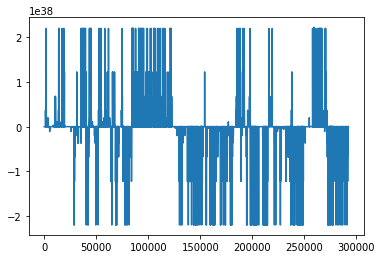

In [121]:
plt.plot(neteav)

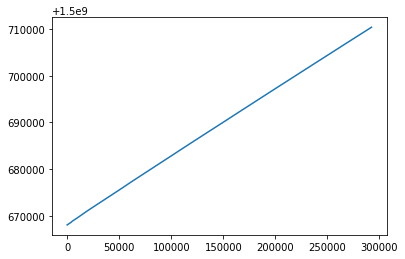

In [122]:
plt.plot(nett)

In [110]:
nett

masked_array(data=[1.50066806e+09, 1.50066806e+09, 1.50066806e+09, ...,
                   1.50071040e+09, 1.50071040e+09, 1.50071040e+09],
             mask=False,
       fill_value=1e+20)

TypeError: join() argument must be str or bytes, not 'list'

In [126]:
files_nc_path = [join(join(path_scada_2017_07, days_in_month[0]), i) for i in files_22_nc]

In [128]:
mf_nc = MFDataset(files_nc_path)

In [129]:
mf_nc

<class 'netCDF4._netCDF4.MFDataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Latitude: 65.12524
    Longitude: -147.487778
    AirportCode: FAI
    PlaceName: PokerFlatResearchRange
    UtilityName: GVEA
    StationName: PokerFlat
    Make: ELKOR
    Model: WattsOn
    SpecSheetURL: http://www.elkor.net/pdfs/WattsOn-Mark_II_Datasheet.pdf
    dimensions = ('time',)
    variables = ('time', 'value')
    groups = ()

In [130]:
mf_nc.variables['value']

<class 'netCDF4._netCDF4._Variable'>
float64 value('time',)
    description: Net Total Energy A
    TypeOfMeasurement: Energy
    Accuracy: 0.20%
    Resolution: 
    Units: kWh
    DeviceRangeMax: 
    DeviceRangeMin: 
    DeviceInstallationDate: 7/19/2017
    Type: 
    TypeDescription: 
    Make: 
    Model: 
    Year: 
    DateInstalled: 
    URLOfQAReport: 
    URLOfDataLicense: 
    DataProvider: ACEP
    QAProvider: 
    CopyrightHolder: ACEP
    URI: 
    time: 
    value: 
    SamplingRate: 
    Scale: 1
    Offset: 0
    RangeMax: 
    RangeMin: 
    TheoreticalRangeMax: 
    TheoreticalRangeMin: 
    ChannelName: FLOAT
    OriginalChannelName: 4897
    OriginalUnits: kWh
    DailyMin: 
    DailyMax: 
    DailyMean: 
    DailyStdDev: 
    MonthlyMin: 
    MonthlyMax: 
    MonthlyMean: 
    MonthlyStdDev: 
    StartTime: 
    Length: 
    AUX_GroupType: Updated
    AUX_Group: Energy
    AUX_Description: Net Energy A
    AUX_LastSampleLabel: EaNetTot(KWh)
unlimited dimensions =

In [144]:
from NetcdfHandler import PsiNetcdf

In [149]:
psiCDF = PsiNetcdf(f1_nc)

In [150]:
psiCDF.previewNetcdf()

Global Attributes:
	Latitude: '65.12524'
	Longitude: '-147.487778'
	AirportCode: 'FAI'
	PlaceName: 'PokerFlatResearchRange'
	UtilityName: 'GVEA'
	StationName: 'PokerFlat'
	Make: 'ELKOR'
	Model: 'WattsOn'
	SpecSheetURL: 'http://www.elkor.net/pdfs/WattsOn-Mark_II_Datasheet.pdf'
NetCDF dimension information:
	Name: time
		size: 292477
		type: dtype('float64')
		units: 'seconds'
		description: 'seconds since the UNIX epoch'
NetCDF variable information:
	Name: value
		dimensions: ('time',)
		size: 292477
		type: dtype('float64')
		description: 'Average Voltage L-L'
		TypeOfMeasurement: 'Voltage'
		Accuracy: '0.30%'
		Resolution: ''
		Units: 'V'
		DeviceRangeMax: ''
		DeviceRangeMin: ''
		DeviceInstallationDate: '7/19/2017'
		Type: ''
		TypeDescription: ''
		Make: ''
		Model: ''
		Year: ''
		DateInstalled: ''
		URLOfQAReport: ''
		URLOfDataLicense: ''
		DataProvider: 'ACEP'
		QAProvider: ''
		CopyrightHolder: 'ACEP'
		URI: ''
		time: ''
		value: ''
		SamplingRate: ''
		Scale: '1'
		Offset: '

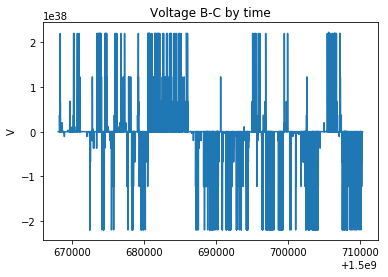

In [151]:
psiCDF.plotNetCDF('Voltage B-C',True)

In [143]:
ply

<module 'matplotlib' from '/home/ubuntu_cp/anaconda3/envs/keras2/lib/python3.6/site-packages/matplotlib/__init__.py'>

In [148]:
class PsiNetcdf():
    import netCDF4
    import matplotlib as ply
    

    def __init__(self,cdf):
        """
        :param cdf: a netcdf object from Netcdf4 library
        """
        self.cdf = cdf
        self.variables = ""
        self.global_attributes = ""
        self.dimensions =""
    def previewNetcdf(self):
        '''
         outputs dimensions, variables and their attribute information.
        The information is similar to that of NCAR's ncdump utility.
        '''
        # NetCDF global attributes
        attrs = self.cdf.ncattrs()
        print("Global Attributes:")
        for attr in attrs:
            print('\t%s:' % attr, repr(self.cdf.getncattr(attr)))
        dims = [dim for dim in self.cdf.dimensions]  # list of nc dimensions
        # Dimension shape information.
        print("NetCDF dimension information:")
        for dim in dims:
            print("\tName:", dim)
            print("\t\tsize:", len(self.cdf.dimensions[dim]))
            self.print_attr(dim)
        # Variable information.
        vars = [var for var in self.cdf.variables]  # list of nc variables
        print("NetCDF variable information:")
        for var in vars:
            if var not in dims:
                print('\tName:', var)
                print("\t\tdimensions:", self.cdf.variables[var].dimensions)
                print("\t\tsize:", self.cdf.variables[var].size)
                self.print_attr(var)

        return

    def print_attr(self, key):
        """
        Prints the NetCDF file attributes for a given key
        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print("\t\ttype:", repr(self.cdf.variables[key].dtype))
            for ncattr in self.cdf.variables[key].ncattrs():
                print('\t\t%s:' % ncattr, \
                      repr(self.cdf.variables[key].getncattr(ncattr)))
        except KeyError:
            print("\t\tWARNING: %s does not contain variable attributes" % key)

    def plotNetCDF(self,variable,save=False):
        """
         Plots the netcdf values against time.       
         :param save: boolean. If true the plot is saved as a pdf. Default is false.
        :return: None
        """
        from matplotlib.backends.backend_pdf import PdfPages
        def makeplot():
            ply.pyplot.title('{0} by time'.format(variable))
            ply.pyplot.ylabel(self.cdf.variables['value'].getncattr('Units'))
            ply.pyplot.plot(x,y)
            
        x = self.cdf['time']
        y = self.cdf['value']
        filename = "{0}_plot.pdf".format(variable)
        if save:
            with PdfPages(filename) as pdf:
                # plot the raw data
                ply.pyplot.figure(figsize=(8, 6))
                makeplot()
                pdf.savefig()  # saves the current figure into a pdf page
                ply.pyplot.close()
        makeplot() #plot to the screen.
        
        

    def plot2NetCDF(self, cdf2, smooth = 60, full = True, save = False):
        """
        :param cdf2: a second PsiNetcdf object
         :param smooth: integer. The number of seconds to average values over. The default is 60, so that average value over 1 minute is plotted against time.
        :param full: boolean. If true the entire dataset is included in one plot. Default is True
        :param save: boolean. If true the plot is saved as a pdf. Default is false.
        :return: None
        """
        return
    


In [161]:
num2date(nett.data[0], seconds )

NameError: name 'seconds' is not defined

In [157]:
nett.data

array([1.50066806e+09, 1.50066806e+09, 1.50066806e+09, ...,
       1.50071040e+09, 1.50071040e+09, 1.50071040e+09])

In [165]:
from datetime import datetime
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(nett.data[0]))

2017-07-21 20:14:17.599595


In [164]:
print(datetime.utcfromtimestamp(nett.data[1]))

2017-07-21 20:14:17.741638


In [167]:
print(datetime.utcfromtimestamp(nett.data[2]))

2017-07-21 20:14:17.899711


In [168]:
899711 - 599595

300116

In [169]:
741638 - 599595 

142043

In [170]:
899711 - 741638

158073

In [172]:
diff = np.diff(nett.data)

(array([2.9181e+05, 5.8800e+02, 1.3000e+01, 1.3000e+01, 2.5000e+01,
        1.0000e+00, 2.2000e+01, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.12734795, 0.29150505, 0.45566216, 0.61981926, 0.78397636,
        0.94813347, 1.11229057, 1.27644768, 1.44060478, 1.60476189,
        1.76891899]),
 <a list of 10 Patch objects>)

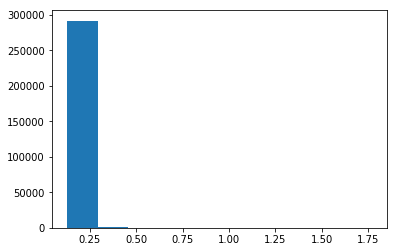

In [173]:
plt.hist(diff)

In [176]:
import scipy.stats

In [177]:
scipy.stats.describe(diff)

DescribeResult(nobs=292476, minmax=(0.1273479461669922, 1.7689189910888672), mean=0.14478473210403578, variance=0.0003520703030986799, skewness=30.39985793565948, kurtosis=1530.4954821540514)

In [178]:
1/0.144


6.944444444444445

In [179]:
nett.data[-1]

1500710403.658902

In [180]:
print(datetime.utcfromtimestamp(nett.data[-1]))

2017-07-22 08:00:03.658902
